<a href="https://colab.research.google.com/github/aakashkumarme/DeepLearning_/blob/main/Normalization_and_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv");
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


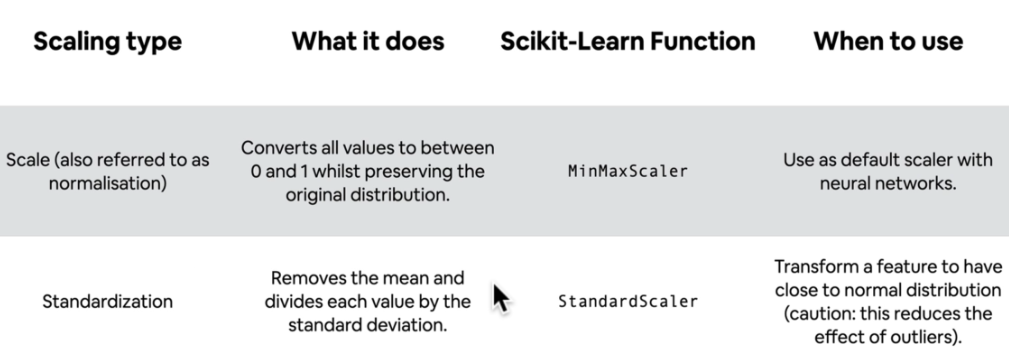

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
     (MinMaxScaler(),["age","bmi","children"]), #turn the columns between 0 and 1
     (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
     
X = insurance.drop("charges" , axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

ct.fit(X_train ) #Transform training and test data with normalization and standarization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [7]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [8]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))